In [1]:
#先導入資料處理會用到的模組
import numpy as np
import numpy.random as random
import scipy as sp
from pandas import Series, DataFrame
import pandas as pd

# 可視化模組
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

# 機器學習模組
import sklearn

In [2]:
#讀檔
dataset = pd.read_csv('input/titanic.csv')
dataset.head(50)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
#觀察資料幾列幾行
dataset.shape

(891, 12)

In [4]:
#觀察整個資料集的資訊
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
#設定seaborn為預設繪圖library
sns.set()

In [6]:
def bar_chart(feature):
    survived = dataset[dataset['Survived'] == 1][feature].value_counts()
    dead = dataset[dataset['Survived'] == 0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',stacked=True, figsize=(10,5))

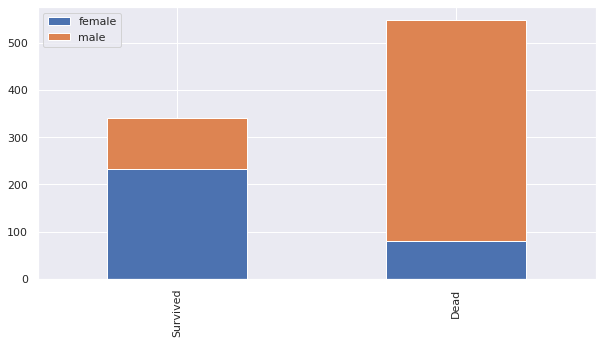

In [7]:
#分別秀出生還/死亡的男女長條圖
bar_chart('Sex')

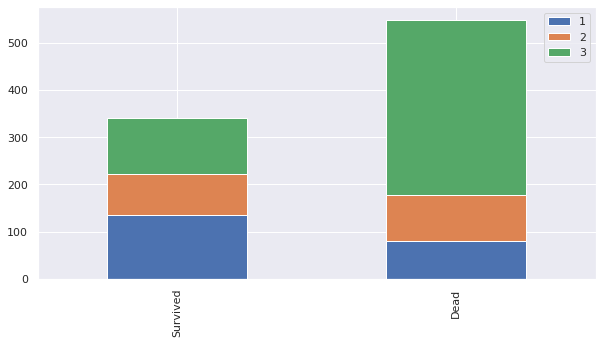

In [8]:
#分別秀出生還/死亡的艙等長條圖
bar_chart('Pclass')

In [9]:
# 計算各個行(欄位)裡有多少個“NaN”
dataset.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Name

In [10]:
#觀察Name欄位
dataset['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [11]:
#取出Mr., Mrs., Miss
dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
#https://reurl.cc/qeZQE
#https://reurl.cc/Neb8n

In [12]:
#統計各稱謂的人數
dataset['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Title, dtype: int64

In [13]:
#titlemapping
title_mapping = {"Mr": 0,"Miss": 1,"Mrs": 2}
dataset['Title'] = dataset['Title'].map(title_mapping).fillna(3)

In [14]:
#現在的dataset
dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,3.0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,1.0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0.0


In [15]:
#現在的dataframe
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0.0


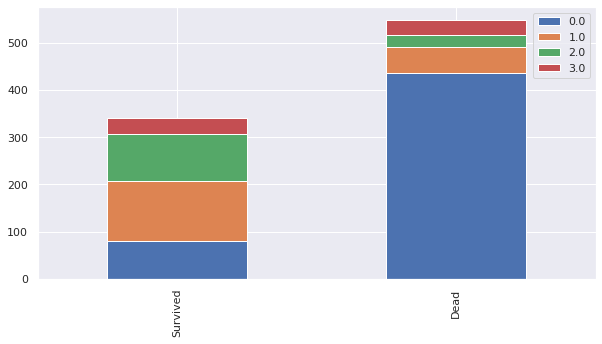

In [16]:
#秀出Title/生還死亡的分佈
bar_chart('Title')

In [17]:
# 刪除Name欄位
dataset = dataset.drop('Name',axis = 1)

In [18]:
#目前的dataframe
dataset.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,2.0
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,2.0
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0.0


# Sex

In [19]:
#mapping sex
sex_mapping = {'male': 0,'female' : 1}
dataset['Sex'] = dataset['Sex'].map(sex_mapping)

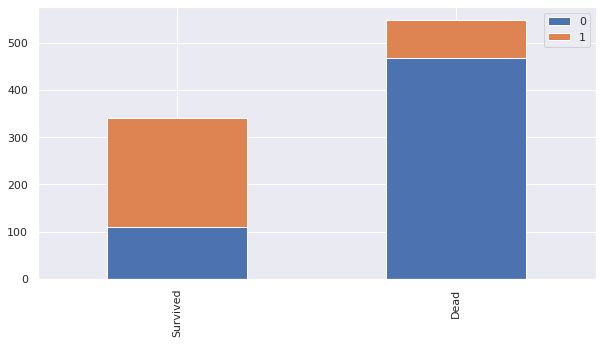

In [20]:
bar_chart('Sex')

In [21]:
#目前的dataframe
dataset.head(100)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,2.0
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,2.0
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,0,3,0,NaN,0,0,374910,8.0500,NaN,S,0.0
96,97,0,1,0,71.0,0,0,PC 17754,34.6542,A5,C,0.0
97,98,1,1,0,23.0,0,1,PC 17759,63.3583,D10 D12,C,0.0
98,99,1,2,1,34.0,0,1,231919,23.0000,NaN,S,2.0


# Age

In [22]:
# fill missing age with median age for each title (Mr, Mrs, Miss, Others)
dataset["Age"].fillna(dataset.groupby("Title")["Age"].transform("median"),inplace = True)
dataset["Age"]

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    21.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

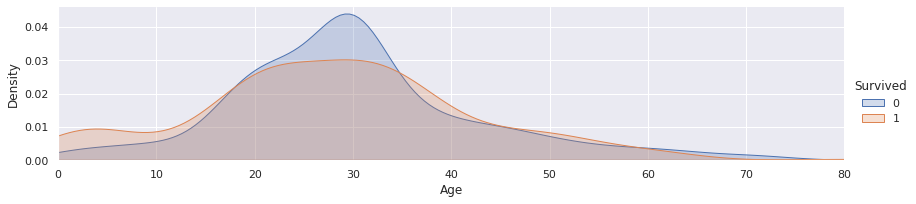

In [23]:
#年齡/生還死亡分布圖
facet = sns.FacetGrid(dataset, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, dataset['Age'].max()))
facet.add_legend()
 
plt.show()

In [24]:
#依年齡區間做mapping function
dataset.loc[dataset['Age']<=16,'Age'] = 0
dataset.loc[(dataset['Age']>16) & (dataset['Age']<=26),'Age'] = 1
dataset.loc[(dataset['Age']>26) & (dataset['Age']<=36),'Age'] = 2
dataset.loc[(dataset['Age']>36) & (dataset['Age']<=62),'Age'] = 3
dataset.loc[dataset['Age']>62,'Age'] = 4


In [25]:
#目前的dataframe
dataset.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,S,0.0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,C,2.0
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,S,2.0
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,S,0.0


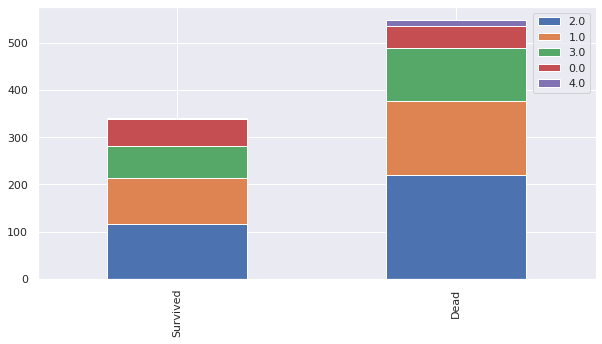

In [26]:
#秀出年齡/生還死亡的分佈
bar_chart('Age')

# Embarked (登船地點)

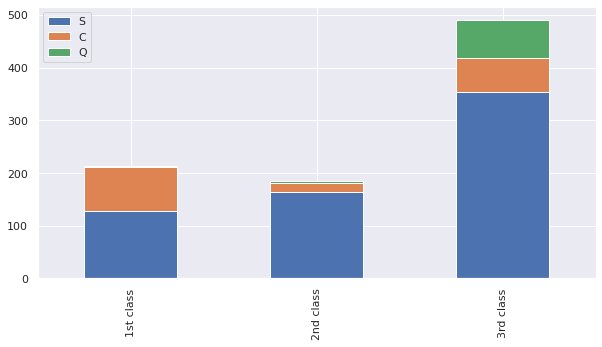

In [27]:
#分析各票種登船地點人數
Pclass1 = dataset[dataset['Pclass']==1]['Embarked'].value_counts()
Pclass2 = dataset[dataset['Pclass']==2]['Embarked'].value_counts()
Pclass3 = dataset[dataset['Pclass']==3]['Embarked'].value_counts()
df = pd.DataFrame([Pclass1,Pclass2,Pclass3])
df.index = ['1st class','2nd class', '3rd class']
df.plot(kind='bar',stacked=True, figsize=(10,5))

In [28]:
#填補登船地點缺失資料
dataset['Embarked'] = dataset['Embarked'].fillna('S')
dataset.head(100)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,S,0.0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,C,2.0
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,S,2.0
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,S,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,0,3,0,2.0,0,0,374910,8.0500,NaN,S,0.0
96,97,0,1,0,4.0,0,0,PC 17754,34.6542,A5,C,0.0
97,98,1,1,0,1.0,0,1,PC 17759,63.3583,D10 D12,C,0.0
98,99,1,2,1,2.0,0,1,231919,23.0000,NaN,S,2.0


In [29]:
# 登船地點的Mapping Function
embarked_mapping = {'S':0,'C':1,'Q':2}
dataset['Embarked'] = dataset['Embarked'].map(embarked_mapping)
dataset.head(100)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,0,0.0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,1,2.0
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1.0
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,0,2.0
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,0,3,0,2.0,0,0,374910,8.0500,NaN,0,0.0
96,97,0,1,0,4.0,0,0,PC 17754,34.6542,A5,1,0.0
97,98,1,1,0,1.0,0,1,PC 17759,63.3583,D10 D12,1,0.0
98,99,1,2,1,2.0,0,1,231919,23.0000,NaN,0,2.0


# Fare(票價)

In [30]:
#填補票價缺失的資料 
dataset['Fare'].fillna(dataset.groupby('Pclass')['Fare'].transform("median"),inplace=True)
dataset.head(50)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,0,0.0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,1,2.0
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1.0
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,0,2.0
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,0,0.0
5,6,0,3,0,2.0,0,0,330877,8.4583,NaN,2,0.0
6,7,0,1,0,3.0,0,0,17463,51.8625,E46,0,0.0
7,8,0,3,0,0.0,3,1,349909,21.0750,NaN,0,3.0
8,9,1,3,1,2.0,0,2,347742,11.1333,NaN,0,2.0
9,10,1,2,1,0.0,1,0,237736,30.0708,NaN,1,2.0


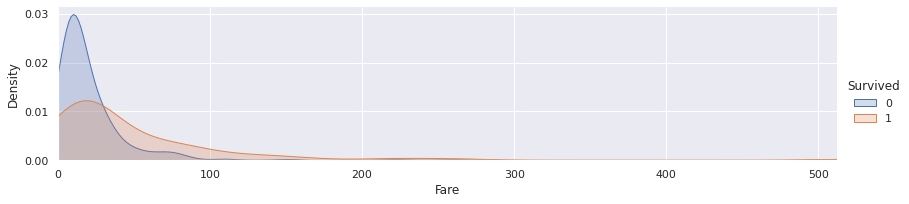

In [31]:
#票價/生還死亡分布圖
facet = sns.FacetGrid(dataset, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, dataset['Fare'].max()))
facet.add_legend()
 
plt.show()

In [32]:
#依票價區間做mapping function
dataset.loc[dataset['Fare'] <= 17, 'Fare'] = 0
dataset.loc[(dataset['Fare'] > 17) & (dataset['Fare'] <= 30),'Fare'] = 1
dataset.loc[(dataset['Fare'] > 30) & (dataset['Fare'] <= 100),'Fare'] = 2
dataset.loc[dataset['Fare'] > 100, 'Fare'] = 3

In [33]:
#目前的dataframe
dataset.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,NaN,0,0.0
1,2,1,1,1,3.0,1,0,PC 17599,2.0,C85,1,2.0
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,NaN,0,1.0
3,4,1,1,1,2.0,1,0,113803,2.0,C123,0,2.0
4,5,0,3,0,2.0,0,0,373450,0.0,NaN,0,0.0


In [34]:
#觀察船艙編號資料
dataset['Cabin'].value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

In [35]:
#觀察船艙編號資料 =>取出第一個字母
dataset['Cabin'] = dataset['Cabin'].str[:1]
dataset['Cabin']

0      NaN
1        C
2      NaN
3        C
4      NaN
      ... 
886    NaN
887      B
888    NaN
889      C
890    NaN
Name: Cabin, Length: 891, dtype: object

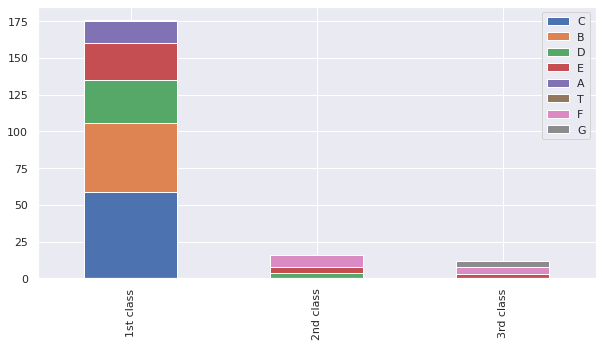

In [36]:
#分析各票種船艙種類人數
Pclass1 = dataset[dataset['Pclass']==1]['Cabin'].value_counts()
Pclass2 = dataset[dataset['Pclass']==2]['Cabin'].value_counts()
Pclass3 = dataset[dataset['Pclass']==3]['Cabin'].value_counts()
df = pd.DataFrame([Pclass1,Pclass2,Pclass3])
df.index = ['1st class','2nd class', '3rd class']
df.plot(kind='bar',stacked=True, figsize=(10,5))

In [37]:
#船艙Mapping
cabin_mapping = {"A":0,"B":0.4,"C":0.8,"D":1.2,"E":1.6,"F":2,"G":2.4,"T":2.8}
dataset['Cabin'] = dataset['Cabin'].map(cabin_mapping)

In [38]:
#填補船艙種類缺失資料
dataset['Cabin'].fillna(dataset.groupby('Pclass')['Cabin'].transform("median"),inplace=True)

In [39]:
#目前的dataframe
dataset.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,2.0,0,0.0
1,2,1,1,1,3.0,1,0,PC 17599,2.0,0.8,1,2.0
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,2.0,0,1.0
3,4,1,1,1,2.0,1,0,113803,2.0,0.8,0,2.0
4,5,0,3,0,2.0,0,0,373450,0.0,2.0,0,0.0


# Sibsp & Parch

In [40]:
#合併Sibsp & Parch
dataset["FamilySize"] = dataset["SibSp"]+dataset["Parch"]+1

(0.0, 11.0)

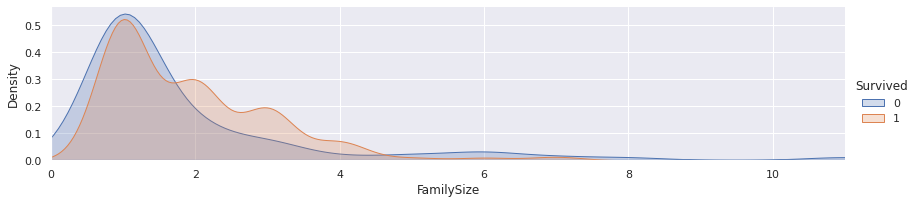

In [41]:
#家族人口/生還死亡分布圖
facet = sns.FacetGrid(dataset, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'FamilySize',shade= True)
facet.set(xlim=(0, dataset['FamilySize'].max()))
facet.add_legend()
plt.xlim(0)

In [42]:
#家族人口的Mapping Function
family_mapping = {1:0,2:0.4,3:0.8,4:1.2,5:1.6,6:2,7:2.4,8:2.8,9:3.2,10:3.6,11:4}
dataset['FamilySize'] = dataset['FamilySize'].map(family_mapping)

In [43]:
#目前的dataframe
dataset.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,2.0,0,0.0,0.4
1,2,1,1,1,3.0,1,0,PC 17599,2.0,0.8,1,2.0,0.4
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,2.0,0,1.0,0.0
3,4,1,1,1,2.0,1,0,113803,2.0,0.8,0,2.0,0.4
4,5,0,3,0,2.0,0,0,373450,0.0,2.0,0,0.0,0.0


# 資料清洗

In [44]:
#刪除Sibsp, Parch, Ticket
feature_drop = ['Ticket','SibSp','Parch','PassengerId']
dataset = dataset.drop(feature_drop,axis = 1)

In [45]:
#設定預測目標變數與解釋變數
dataset_data = dataset.drop('Survived',axis=1)
dataset_target = dataset['Survived']
dataset_target2 = dataset[['Survived']]
dataset_data.shape, dataset_target.shape,dataset_target2

((891, 8), (891,),      Survived
 0           0
 1           1
 2           1
 3           1
 4           0
 ..        ...
 886         0
 887         1
 888         0
 889         1
 890         0
 
 [891 rows x 1 columns])

In [46]:
#目前的所有解釋變數
dataset_data.head()

,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,3,0,1.0,0.0,2.0,0,0.0,0.4
1,1,1,3.0,2.0,0.8,1,2.0,0.4
2,3,1,1.0,0.0,2.0,0,1.0,0.0
3,1,1,2.0,2.0,0.8,0,2.0,0.4
4,3,0,2.0,0.0,2.0,0,0.0,0.0


In [47]:
#確認欄位的資料型態均為數值型別
dataset_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      891 non-null    int64  
 1   Sex         891 non-null    int64  
 2   Age         891 non-null    float64
 3   Fare        891 non-null    float64
 4   Cabin       891 non-null    float64
 5   Embarked    891 non-null    int64  
 6   Title       891 non-null    float64
 7   FamilySize  891 non-null    float64
dtypes: float64(5), int64(3)
memory usage: 55.8 KB


# 建置模型-DNN

In [48]:
#導入keras與sklearn
from tensorflow import keras
from keras.models import Sequential
from keras.layers.core import Dense,Activation
from tensorflow.keras.optimizers import Adamax
from sklearn import preprocessing

In [49]:
#建立模型函式
def build_model():
    #建立模型
    model = Sequential()
    #將模型疊起
    model.add(Dense(input_dim=8,units=40))
    model.add(Activation('relu'))
    model.add(Dense(units=100))
    model.add(Activation('relu'))
    model.add(Dense(units=10))
    model.add(Activation('relu'))
    model.add(Dense(units=1))
    model.add(Activation('sigmoid'))
    model.summary()
    return model

    

In [50]:
#建置繪圖函式
def show_train_history(train_history,train,validation,label):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(label)
    plt.xlabel('Epoch')
    plt.legend(['train','validation'],loc='upper left')
    plt.show()

In [51]:
#feature標準化
minmax_scale = preprocessing.MinMaxScaler(feature_range=(0,1))
scaledFeatures = minmax_scale.fit_transform(dataset_data)

In [52]:
#訓練模型
model = build_model()

#開始訓練模型
model.compile(loss = 'binary_crossentropy',optimizer="adam",metrics=['acc'])
train_history = model.fit(scaledFeatures,dataset_target,validation_split=0.2,batch_size=30,epochs=20)

#顯示訓練結果
score = model.evaluate(x=scaledFeatures,y=dataset_target)
print ('\nTrain Loss:', score[0])
print ('\nTrain Acc:', score[1])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 40)                360       
                                                                 
 activation (Activation)     (None, 40)                0         
                                                                 
 dense_1 (Dense)             (None, 100)               4100      
                                                                 
 activation_1 (Activation)   (None, 100)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
 activation_2 (Activation)   (None, 10)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 1

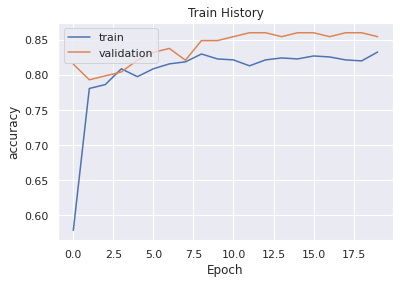

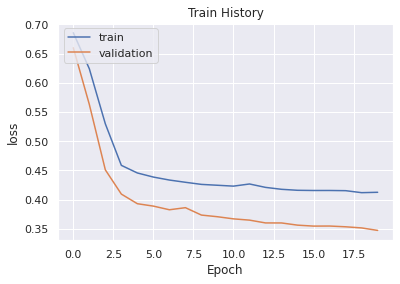

In [53]:
#顯示訓練結果
show_train_history(train_history,'acc','val_acc','accuracy')
show_train_history(train_history,'loss','val_loss','loss')

# 測試模型

In [54]:
#將測試資料按照和訓練資料一樣的方式做欄位的轉換
testset = pd.read_csv('input/test.csv')

#Name
testset['Title'] = testset['Name'].str.extract(' ([A-Za-z]+).', expand=False)
title_mapping = {"Mr": 0,"Miss": 1,"Mrs": 2}
testset['Title'] = testset['Title'].map(title_mapping).fillna(3)

#刪除Name column
testset = testset.drop('Name',axis = 1)

#Sex 
sex_mapping = {"male":0,"female":1}
testset['Sex'] = testset['Sex'].map(sex_mapping)

#Age
testset['Age'].fillna(testset.groupby("Title")["Age"].transform("median"),inplace = True)
testset.loc[testset['Age']<=16,'Age'] = 0
testset.loc[(testset['Age']>16) & (testset['Age']<=26),'Age'] = 1
testset.loc[(testset['Age']>26) & (testset['Age']<=36),'Age'] = 2
testset.loc[(testset['Age']>36) & (testset['Age']<=62),'Age'] = 3
testset.loc[testset['Age']>62,'Age'] = 4

#Embark
testset['Embarked'] = testset['Embarked'].fillna('S')
embarked_mapping = {'S':0,'C':1,'Q':2}
testset['Embarked'] = testset['Embarked'].map(embarked_mapping)

#Fare
testset['Fare'].fillna(testset.groupby('Pclass')['Fare'].transform("median"),inplace = True)
testset.loc[testset['Fare'] <= 17, 'Fare'] = 0
testset.loc[(testset['Fare'] > 17) & (testset['Fare'] <= 30),'Fare'] = 1
testset.loc[(testset['Fare'] > 30) & (testset['Fare'] <= 100),'Fare'] = 2
testset.loc[testset['Fare'] > 100, 'Fare'] = 3

testset['Cabin'] = testset['Cabin'].str[:1]
cabin_mapping = {"A":0,"B":0.4,"C":0.8,"D":1.2,"E":1.6,"F":2,"G":2.4,"T":2.8}
testset['Cabin'] = testset['Cabin'].map(cabin_mapping)
testset['Cabin'].fillna(testset.groupby('Pclass')['Cabin'].transform("median"),inplace=True)

#FamilSize
testset["FamilySize"] = testset["SibSp"]+testset["Parch"]+1
family_mapping = {1:0,2:0.4,3:0.8,4:1.2,5:1.6,6:2,7:2.4,8:2.8,9:3.2,10:3.6,11:4}
testset['FamilySize'] = testset['FamilySize'].map(family_mapping)

#資料清洗
feature_drop = ['Ticket','SibSp','Parch','PassengerId']
testset = testset.drop(feature_drop,axis = 1)


In [55]:
#使用model.predict預測生還機率
#請輸入程式碼
probability = model.predict(testset)
probability

array([[2.12439895e-03],
       [2.42429972e-03],
       [1.94185972e-03],
       [2.71034241e-03],
       [1.32961273e-02],
       [1.24407709e-02],
       [4.50664759e-03],
       [6.16794825e-03],
       [4.88044024e-02],
       [2.28500366e-03],
       [2.71034241e-03],
       [6.57489896e-03],
       [8.85640621e-01],
       [6.65128231e-04],
       [1.57847345e-01],
       [8.77992153e-01],
       [5.06651402e-03],
       [6.69556856e-03],
       [4.54559922e-03],
       [3.33714485e-03],
       [3.65552306e-03],
       [4.20627058e-01],
       [1.16125584e-01],
       [3.03693414e-02],
       [4.83589172e-02],
       [8.38428736e-04],
       [4.62588787e-01],
       [6.69556856e-03],
       [5.86333871e-03],
       [1.22594833e-03],
       [1.75461173e-03],
       [4.80008125e-03],
       [3.37904692e-03],
       [1.45864487e-03],
       [1.05051696e-02],
       [6.69556856e-03],
       [1.28182769e-02],
       [1.28182769e-02],
       [5.75804710e-03],
       [1.64663792e-03],


In [56]:
for i in range(len(probability)):
  if probability[i] > 0.5:
    probability[i] = 1
  else:
    probability[i] = 0

probability = probability.astype(int)

In [57]:
#獲得模型的weights
W,b = model.layers[0].get_weights()
print("weights = {}, \n\n biases = {}".format(W,b))

weights = [[ 0.24314745 -0.28011262  0.04925429  0.2918242  -0.16262582  0.37057167
  -0.34075835  0.3022499  -0.19818266 -0.1689161   0.2414069   0.04066624
   0.08455028 -0.3132802  -0.16622655  0.255164    0.07191309  0.00691558
  -0.18535264  0.23567684 -0.276661   -0.38869396 -0.14557213 -0.343946
   0.40764198 -0.39342    -0.12989871  0.18978025 -0.12039847  0.14052811
  -0.14573446 -0.31030217  0.15907967 -0.20866328  0.25832278 -0.18795751
  -0.28893638 -0.18990456  0.27113488  0.31863865]
 [-0.13394397  0.35469997 -0.15039629  0.33319476 -0.1782193   0.08672022
   0.06177188 -0.33072898 -0.30962878 -0.2861213  -0.17084712 -0.12124098
   0.2131799   0.32859764 -0.29085407  0.00058074  0.30532318  0.2969358
   0.29119828 -0.11194909  0.3280639   0.06440255 -0.24454403  0.15726271
  -0.19631109  0.12430612  0.3010854   0.05156771 -0.29273248  0.02395728
   0.05507321  0.12197243 -0.25369745  0.3596488   0.18769749 -0.16750932
  -0.23969524 -0.17981042  0.13869914 -0.12126335]
 [ 

In [58]:
probability = probability.flatten()

testdata_write = pd.read_csv('input/test.csv')

submission = pd.DataFrame({
    'PassengerId' : testdata_write['PassengerId'],
    'Survived' : probability
})

submission.to_csv('submission.csv',index = False)

In [59]:
#儲存模型
#請輸入程式碼
model.save("dnnfortitanic.h5")

In [60]:
#import package
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn import ensemble, metrics
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle
import math

In [62]:
#svm
#引入library
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC

#10-fold cross-validation
kfold = KFold(10, shuffle = True)
predicted = []
expected = []

#訓練模型
for train,test in kfold.split(dataset_data):
    X_train = dataset_data.iloc[train]
    Y_train = dataset_target.iloc[train]
    X_test = dataset_data.iloc[test]
    Y_test = dataset_target.iloc[test]
    svm = OneVsRestClassifier(SVC(gamma = 'scale')).fit(X_train,Y_train)
    expected.extend(Y_test)
    predicted.extend(svm.predict(X_test))

In [63]:
print("Macro-average: {0}".format(metrics.f1_score(expected,predicted,average='macro')))
print("Micro-average: {0}".format(metrics.f1_score(expected,predicted,average='micro')))
print(metrics.classification_report(expected,predicted))
print(metrics.confusion_matrix(expected, predicted))
accuracy = accuracy_score(expected, predicted)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

print("Average = macro")
print('precision:',metrics.precision_score(expected, predicted,average='macro')) 
print('recall:',metrics.recall_score(expected, predicted,average='macro'))
print('F1-score:',metrics.f1_score(expected, predicted,labels=[1,2,3,4],average='macro'))

print("\n")
print("Average = micro")
print('precision:', metrics.precision_score(expected, predicted, average='micro')) 
print('recall:',metrics.recall_score(expected, predicted,average='micro'))
print('F1-score:',metrics.f1_score(expected, predicted,labels=[1,2,3,4],average='micro'))

print("\n")
print("Average = weighted")
print('precision:', metrics.precision_score(expected, predicted, average='weighted'))
print('recall:',metrics.recall_score(expected, predicted,average='weighted'))
print('F1-score:',metrics.f1_score(expected,predicted,labels=[1,2,3,4],average='weighted'))

Macro-average: 0.8195187165775402
Micro-average: 0.8316498316498315
              precision    recall  f1-score   support

           0       0.85      0.89      0.87       549
           1       0.80      0.75      0.77       342

    accuracy                           0.83       891
   macro avg       0.83      0.82      0.82       891
weighted avg       0.83      0.83      0.83       891

[[486  63]
 [ 87 255]]
Accuracy: 83.16%
Average = macro
precision: 0.825027165859923
recall: 0.8154299683635318
F1-score: 0.1931818181818182


Average = micro
precision: 0.8316498316498316
recall: 0.8316498316498316
F1-score: 0.7727272727272728


Average = weighted
precision: 0.8304032122070253
recall: 0.8316498316498316
F1-score: 0.7727272727272728


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1580: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1580: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


In [64]:
predicted = svm.predict(testset)
predicted

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [65]:
testdata_write = pd.read_csv('input/test.csv')

submission = pd.DataFrame({
    'PassengerId' : testdata_write['PassengerId'],
    'Survived' : predicted
})

submission.to_csv('submission_SVM.csv',index = False)

In [66]:
#Random Forest
#引入library
from sklearn.multiclass import OneVsRestClassifier
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn import ensemble, metrics
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle
import math

#10-fold cross-validation
kfold = KFold(10, shuffle = True)
predicted = []
expected = []

#訓練模型
for train,test in kfold.split(dataset):
     X_train = dataset_data.iloc[train]
     Y_train = dataset_target.iloc[train]
     X_test = dataset_data.iloc[test]
     Y_test = dataset_target.iloc[test]
     forest = ensemble.RandomForestClassifier(n_estimators=100)
     forest.fit(X_train,Y_train)
     expected.extend(Y_test)
     predicted.extend(forest.predict(X_test))

In [67]:
print("Macro-average: {0}".format(metrics.f1_score(expected,predicted,average='macro')))
print("Micro-average: {0}".format(metrics.f1_score(expected,predicted,average='micro')))
print(metrics.classification_report(expected,predicted))
print(metrics.confusion_matrix(expected, predicted))
accuracy = accuracy_score(expected, predicted)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

print("Average = macro")
print('precision:',metrics.precision_score(expected, predicted,average='macro')) 
print('recall:',metrics.recall_score(expected, predicted,average='macro'))
print('F1-score:',metrics.f1_score(expected, predicted,labels=[1,2,3,4],average='macro'))

print("\n")
print("Average = micro")
print('precision:', metrics.precision_score(expected, predicted, average='micro')) 
print('recall:',metrics.recall_score(expected, predicted,average='micro'))
print('F1-score:',metrics.f1_score(expected, predicted,labels=[1,2,3,4],average='micro'))

print("\n")
print("Average = weighted")
print('precision:', metrics.precision_score(expected, predicted, average='weighted'))
print('recall:',metrics.recall_score(expected, predicted,average='weighted'))
print('F1-score:',metrics.f1_score(expected,predicted,labels=[1,2,3,4],average='weighted'))

Macro-average: 0.7986849315068493
Micro-average: 0.8125701459034792
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       549
           1       0.78      0.72      0.75       342

    accuracy                           0.81       891
   macro avg       0.80      0.79      0.80       891
weighted avg       0.81      0.81      0.81       891

[[479  70]
 [ 97 245]]
Accuracy: 81.26%
Average = macro
precision: 0.8046875
recall: 0.794434857635893
F1-score: 0.18645357686453576


Average = micro
precision: 0.8125701459034792
recall: 0.8125701459034792
F1-score: 0.745814307458143


Average = weighted
precision: 0.810939253647587
recall: 0.8125701459034792
F1-score: 0.745814307458143


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1580: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1580: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


In [68]:
predicted_RF = forest.predict(testset)
predicted_RF

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [69]:
testdata_write = pd.read_csv('input/test.csv')

submission = pd.DataFrame({
    'PassengerId' : testdata_write['PassengerId'],
    'Survived' : predicted_RF
})

submission.to_csv('submission_RF.csv',index = False)